In [1]:
import numpy as np
import time
import pandas as pd
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import gzip

df = pd.read_table("SNV/MANIFEST.txt")
fileslist = []
header = []
for file_name in df[0:33]["filename"]:
    fileslist.append(file_name)
with gzip.open("SNV/"+fileslist[1],"rb") as f:
    print(f)
    i = 0
    while i <=4:
        header.append(f.readline())
        i += 1
    mf = pd.read_csv(f, delimiter = "\t")
    table = mf[0:]
table

<gzip _io.BufferedReader name='SNV/03652df4-6090-4f5a-a2ff-ee28a37f9301/TCGA.COAD.mutect.03652df4-6090-4f5a-a2ff-ee28a37f9301.DR-10.0.somatic.maf.gz' 0x2542926db20>


C:\Users\anjel\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (87,98,118) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,...,FILTER,CONTEXT,src_vcf_id,tumor_bam_uuid,normal_bam_uuid,case_id,GDC_FILTER,COSMIC,MC3_Overlap,GDC_Validation_Status
0,GNB1,2782,WUGSC;BCM,GRCh38,chr1,1787353,1787353,+,Missense_Mutation,SNP,...,PASS,GGAAGCTATCC,3fa01570-9853-477a-899d-5c1140dc6289,05d73da9-f655-4b92-840e-fca14bfd1ad7,ad8c4921-7b03-4fcf-98f3-e151d4d6a54b,bc42fe2d-1a33-428d-a601-b1871f4c8d9b,wga_normal,NaN,Unknown,Unknown
1,WRAP73,49856,WUGSC;BCM,GRCh38,chr1,3635335,3635335,+,Intron,SNP,...,PASS,CCCCCGTCGCC,3fa01570-9853-477a-899d-5c1140dc6289,05d73da9-f655-4b92-840e-fca14bfd1ad7,ad8c4921-7b03-4fcf-98f3-e151d4d6a54b,bc42fe2d-1a33-428d-a601-b1871f4c8d9b,wga_normal,NaN,Unknown,Unknown
2,TAS1R1,80835,WUGSC;BCM,GRCh38,chr1,6576962,6576962,+,Missense_Mutation,SNP,...,PASS,AGTCTGTGTGT,3fa01570-9853-477a-899d-5c1140dc6289,05d73da9-f655-4b92-840e-fca14bfd1ad7,ad8c4921-7b03-4fcf-98f3-e151d4d6a54b,bc42fe2d-1a33-428d-a601-b1871f4c8d9b,wga_normal,COSM273329,Unknown,Unknown
3,DNAJC11,55735,WUGSC;BCM,GRCh38,chr1,6645866,6645866,+,Nonsense_Mutation,SNP,...,PASS,CCATCGCCACT,3fa01570-9853-477a-899d-5c1140dc6289,05d73da9-f655-4b92-840e-fca14bfd1ad7,ad8c4921-7b03-4fcf-98f3-e151d4d6a54b,bc42fe2d-1a33-428d-a601-b1871f4c8d9b,wga_normal,COSM272600;COSM272601,Unknown,Unknown
4,PRDM2,7799,WUGSC;BCM,GRCh38,chr1,13732841,13732841,+,Frame_Shift_Del,DEL,...,PASS,GATAAGAAAAAA,3fa01570-9853-477a-899d-5c1140dc6289,05d73da9-f655-4b92-840e-fca14bfd1ad7,ad8c4921-7b03-4fcf-98f3-e151d4d6a54b,bc42fe2d-1a33-428d-a601-b1871f4c8d9b,wga_normal,COSM4717494;COSM4717495,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264781,CSF2RA,1438,BCM,GRCh38,chrX,1305650,1305650,+,Intron,SNP,...,panel_of_normals,CCACCGGTGTG,b200562d-efde-44a8-b03b-a8b463e54576,d7d6fae8-bbf6-46ec-a7cd-fa715d615832,8d1026f0-8846-49a9-840b-fd8ccfda5c80,639e1050-088a-48fe-a0ef-4a01a3468cac,gdc_pon,NaN,True,Unknown
264782,MXRA5,25878,BCM,GRCh38,chrX,3310142,3310142,+,Silent,SNP,...,PASS,GAAACGCGTCC,b200562d-efde-44a8-b03b-a8b463e54576,d7d6fae8-bbf6-46ec-a7cd-fa715d615832,8d1026f0-8846-49a9-840b-fd8ccfda5c80,639e1050-088a-48fe-a0ef-4a01a3468cac,NaN,COSM1120359;COSM1120360,True,Unknown
264783,XAGE5,170627,BCM,GRCh38,chrX,52812610,52812610,+,Missense_Mutation,SNP,...,PASS,TTTACGACTTG,b200562d-efde-44a8-b03b-a8b463e54576,d7d6fae8-bbf6-46ec-a7cd-fa715d615832,8d1026f0-8846-49a9-840b-fd8ccfda5c80,639e1050-088a-48fe-a0ef-4a01a3468cac,NaN,NaN,True,Unknown
264784,GPR101,83550,BCM,GRCh38,chrX,137031123,137031123,+,Missense_Mutation,SNP,...,PASS,CAGATCATGGA,b200562d-efde-44a8-b03b-a8b463e54576,d7d6fae8-bbf6-46ec-a7cd-fa715d615832,8d1026f0-8846-49a9-840b-fd8ccfda5c80,639e1050-088a-48fe-a0ef-4a01a3468cac,NaN,NaN,True,Unknown


In [2]:
Y = table["Chromosome"] #independent variables
X = table.drop(["Hugo_Symbol","Chromosome"], axis = 1) #dependent variables
#Convert columns to best possible dtypes
    #X = X.convert_dtypes()

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264786 entries, 0 to 264785
Columns: 118 entries, Entrez_Gene_Id to GDC_Validation_Status
dtypes: float64(40), int64(9), object(69)
memory usage: 238.4+ MB


In [26]:

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264786 entries, 0 to 264785
Columns: 118 entries, Entrez_Gene_Id to GDC_Validation_Status
dtypes: float64(40), int64(9), object(69)
memory usage: 238.4+ MB


In [27]:
m = X.isna().sum().tolist()
m.sort(reverse =True)
print(m)

[264786, 264786, 264786, 264786, 264786, 264786, 264786, 264786, 264786, 264786, 264786, 264786, 264786, 264786, 264786, 264786, 264786, 264786, 264613, 264333, 263057, 263021, 261575, 251642, 250211, 250211, 250211, 250211, 250211, 249175, 248562, 246331, 246331, 230669, 230669, 230669, 221903, 214573, 204330, 204324, 204324, 204324, 204324, 204324, 204324, 204324, 204324, 198992, 196598, 143393, 134455, 126509, 110171, 91632, 67128, 56440, 48854, 48848, 48848, 46273, 31209, 27499, 19477, 19477, 18954, 16264, 13499, 5011, 5011, 5011, 3273, 2033, 36, 36, 36, 36, 36, 34, 33, 33, 33, 33, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [30]:
def handle_nan_values(X):
    
    #Convert columns to best possible dtypes
    #X = X.convert_dtypes()
    
    to_replace = {"Unknown": False,"False":False,"True":True}
    
    #Handle mixed types in MC3_Overlap column
    if X["MC3_Overlap"].dtype == "object":
        X["MC3_Overlap"] = X["MC3_Overlap"].replace(to_replace)
    
    #Remove columns with all rows values NaN
    X.dropna(axis=1,how="all", inplace = True)
    
    #Remove columns that are below treshold 0.70(70%)
    length = len(Y)
    thresh = length*0.70
    X.dropna(axis=1,thresh=int(thresh), inplace = True)
    
    #Fill nan values with 0
    int_columns = X.select_dtypes("int64").columns
    float_columns = X.select_dtypes("float64").columns
    
    X[int_columns] = X[int_columns].fillna(0)
    X[float_columns] = X[float_columns].fillna(0)
    #X[X.select_dtypes("float64").columns] = X[X.select_dtypes("float64").columns].astype("int64")
        
    #Fill remaining nan values with "NaN"
    X = X.fillna("NaN")

    return X

In [31]:
X = handle_nan_values(X)
X

,Entrez_Gene_Id,Center,NCBI_Build,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,...,TSL,MINIMISED,FILTER,CONTEXT,src_vcf_id,tumor_bam_uuid,normal_bam_uuid,case_id,MC3_Overlap,GDC_Validation_Status
0,2782,WUGSC;BCM,GRCh38,1787353,1787353,+,Missense_Mutation,SNP,C,C,...,1.0,1,PASS,GGAAGCTATCC,3fa01570-9853-477a-899d-5c1140dc6289,05d73da9-f655-4b92-840e-fca14bfd1ad7,ad8c4921-7b03-4fcf-98f3-e151d4d6a54b,bc42fe2d-1a33-428d-a601-b1871f4c8d9b,False,Unknown
1,49856,WUGSC;BCM,GRCh38,3635335,3635335,+,Intron,SNP,G,G,...,1.0,1,PASS,CCCCCGTCGCC,3fa01570-9853-477a-899d-5c1140dc6289,05d73da9-f655-4b92-840e-fca14bfd1ad7,ad8c4921-7b03-4fcf-98f3-e151d4d6a54b,bc42fe2d-1a33-428d-a601-b1871f4c8d9b,False,Unknown
2,80835,WUGSC;BCM,GRCh38,6576962,6576962,+,Missense_Mutation,SNP,G,G,...,1.0,1,PASS,AGTCTGTGTGT,3fa01570-9853-477a-899d-5c1140dc6289,05d73da9-f655-4b92-840e-fca14bfd1ad7,ad8c4921-7b03-4fcf-98f3-e151d4d6a54b,bc42fe2d-1a33-428d-a601-b1871f4c8d9b,False,Unknown
3,55735,WUGSC;BCM,GRCh38,6645866,6645866,+,Nonsense_Mutation,SNP,G,G,...,1.0,1,PASS,CCATCGCCACT,3fa01570-9853-477a-899d-5c1140dc6289,05d73da9-f655-4b92-840e-fca14bfd1ad7,ad8c4921-7b03-4fcf-98f3-e151d4d6a54b,bc42fe2d-1a33-428d-a601-b1871f4c8d9b,False,Unknown
4,7799,WUGSC;BCM,GRCh38,13732841,13732841,+,Frame_Shift_Del,DEL,A,A,...,1.0,1,PASS,GATAAGAAAAAA,3fa01570-9853-477a-899d-5c1140dc6289,05d73da9-f655-4b92-840e-fca14bfd1ad7,ad8c4921-7b03-4fcf-98f3-e151d4d6a54b,bc42fe2d-1a33-428d-a601-b1871f4c8d9b,False,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264781,1438,BCM,GRCh38,1305650,1305650,+,Intron,SNP,G,G,...,1.0,1,panel_of_normals,CCACCGGTGTG,b200562d-efde-44a8-b03b-a8b463e54576,d7d6fae8-bbf6-46ec-a7cd-fa715d615832,8d1026f0-8846-49a9-840b-fd8ccfda5c80,639e1050-088a-48fe-a0ef-4a01a3468cac,True,Unknown
264782,25878,BCM,GRCh38,3310142,3310142,+,Silent,SNP,G,G,...,5.0,1,PASS,GAAACGCGTCC,b200562d-efde-44a8-b03b-a8b463e54576,d7d6fae8-bbf6-46ec-a7cd-fa715d615832,8d1026f0-8846-49a9-840b-fd8ccfda5c80,639e1050-088a-48fe-a0ef-4a01a3468cac,True,Unknown
264783,170627,BCM,GRCh38,52812610,52812610,+,Missense_Mutation,SNP,G,G,...,1.0,1,PASS,TTTACGACTTG,b200562d-efde-44a8-b03b-a8b463e54576,d7d6fae8-bbf6-46ec-a7cd-fa715d615832,8d1026f0-8846-49a9-840b-fd8ccfda5c80,639e1050-088a-48fe-a0ef-4a01a3468cac,True,Unknown
264784,83550,BCM,GRCh38,137031123,137031123,+,Missense_Mutation,SNP,C,C,...,0.0,1,PASS,CAGATCATGGA,b200562d-efde-44a8-b03b-a8b463e54576,d7d6fae8-bbf6-46ec-a7cd-fa715d615832,8d1026f0-8846-49a9-840b-fd8ccfda5c80,639e1050-088a-48fe-a0ef-4a01a3468cac,True,Unknown


In [6]:
def n(X):
    for c in X.columns:
        if pd.api.types.is_object_dtype(X[c]):
            X[c] = X[c].str.split(';')
    return X

In [59]:
print(X["GDC_Validation_Status"].value_counts())
percent_vals = (X["CCDS"].value_counts()/len(X)*100).values
print(percent_vals)

Unknown    7821
Valid      2628
Name: GDC_Validation_Status, dtype: int64
[0.56464733 0.21054646 0.19140588 ... 0.00957029 0.00957029 0.00957029]


In [8]:
def get_similar_value_cols(X, thresh=90):
    
    number_of_cols = 0
    similar_values = []
    
    for c in X.columns:
        #percentage of each value inside columns
        percent_vals = (X[c].value_counts()/len(X)*100).values
        
        #filter columns where more than 90% values are same
        if percent_vals[0] > thresh:# and len(percent_vals) > 2:
            similar_values.append(c)
            number_of_cols += 1  
    print("Total columns with majority singular value shares: ", number_of_cols)
    return similar_values   

In [9]:
X.drop(get_similar_value_cols(X), axis = 1,inplace=True)
X 

Total columns with majority singular value shares:  13


,Entrez_Gene_Id,Start_Position,End_Position,Variant_Classification,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,dbSNP_RS,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,...,EXON,IMPACT,PICK,TSL,CONTEXT,src_vcf_id,tumor_bam_uuid,normal_bam_uuid,case_id,GDC_Validation_Status
0,6536,44008472,44008472,Silent,G,G,A,rs200658319,TCGA-N6-A4VD-01A-11D-A28R-08,TCGA-N6-A4VD-11A-11D-A28U-08,...,5/14,LOW,1.0,1.0,ACACCGGCGCA,85b191fa-e8f6-4d97-bc13-0bc236cee6c8,3d52eda9-5f36-4a55-8a3c-07a576a0ef1f,6c3037f4-9838-4b36-9551-99e91cb85ef0,14213209-2217-4812-9a19-d9b2b6718467,Valid
1,1263,44803280,44803280,Missense_Mutation,G,G,A,rs370347467,TCGA-N6-A4VD-01A-11D-A28R-08,TCGA-N6-A4VD-11A-11D-A28U-08,...,8/15,MODERATE,1.0,1.0,CCCCCGATCGA,85b191fa-e8f6-4d97-bc13-0bc236cee6c8,3d52eda9-5f36-4a55-8a3c-07a576a0ef1f,6c3037f4-9838-4b36-9551-99e91cb85ef0,14213209-2217-4812-9a19-d9b2b6718467,Valid
2,199920,56740711,56740711,Silent,C,C,T,rs140363025,TCGA-N6-A4VD-01A-11D-A28R-08,TCGA-N6-A4VD-11A-11D-A28U-08,...,13/20,LOW,1.0,1.0,TCTTTCGACTT,85b191fa-e8f6-4d97-bc13-0bc236cee6c8,3d52eda9-5f36-4a55-8a3c-07a576a0ef1f,6c3037f4-9838-4b36-9551-99e91cb85ef0,14213209-2217-4812-9a19-d9b2b6718467,Unknown
3,2629,155233116,155233116,3'Flank,C,C,T,novel,TCGA-N6-A4VD-01A-11D-A28R-08,TCGA-N6-A4VD-11A-11D-A28U-08,...,NaN,MODIFIER,1.0,1.0,GCATGCAGCGG,85b191fa-e8f6-4d97-bc13-0bc236cee6c8,3d52eda9-5f36-4a55-8a3c-07a576a0ef1f,6c3037f4-9838-4b36-9551-99e91cb85ef0,14213209-2217-4812-9a19-d9b2b6718467,Unknown
4,83417,157581530,157581530,Splice_Site,C,C,T,novel,TCGA-N6-A4VD-01A-11D-A28R-08,TCGA-N6-A4VD-11A-11D-A28U-08,...,NaN,HIGH,1.0,1.0,ACAAACCTGAC,85b191fa-e8f6-4d97-bc13-0bc236cee6c8,3d52eda9-5f36-4a55-8a3c-07a576a0ef1f,6c3037f4-9838-4b36-9551-99e91cb85ef0,14213209-2217-4812-9a19-d9b2b6718467,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10444,6247,18642139,18642139,Silent,C,C,T,rs767660711,TCGA-N7-A59B-01A-11D-A28R-08,TCGA-N7-A59B-10A-01D-A28U-08,...,6/6,LOW,1.0,1.0,CGGTCCGAGTT,1d4f6015-1138-4d11-ae68-5034b9af7511,810c44b5-8901-4877-8ca6-bedfd040e0c2,e052d1b5-8959-43df-916a-8dce7977fdc0,200f77a5-803c-4891-980b-5c3b08c91254,Unknown
10445,7317,47201524,47201524,Missense_Mutation,T,T,C,novel,TCGA-N7-A59B-01A-11D-A28R-08,TCGA-N7-A59B-10A-01D-A28U-08,...,8/26,MODERATE,1.0,1.0,CGGGTTTGAGA,1d4f6015-1138-4d11-ae68-5034b9af7511,810c44b5-8901-4877-8ca6-bedfd040e0c2,e052d1b5-8959-43df-916a-8dce7977fdc0,200f77a5-803c-4891-980b-5c3b08c91254,Unknown
10446,441531,77969434,77969434,Missense_Mutation,T,T,A,novel,TCGA-N7-A59B-01A-11D-A28R-08,TCGA-N7-A59B-10A-01D-A28U-08,...,1/1,MODERATE,NaN,NaN,CACTGTCCAGA,1d4f6015-1138-4d11-ae68-5034b9af7511,810c44b5-8901-4877-8ca6-bedfd040e0c2,e052d1b5-8959-43df-916a-8dce7977fdc0,200f77a5-803c-4891-980b-5c3b08c91254,Unknown
10447,9737,102657224,102657224,Missense_Mutation,C,C,T,novel,TCGA-N7-A59B-01A-11D-A28R-08,TCGA-N7-A59B-10A-01D-A28U-08,...,5/5,MODERATE,NaN,2.0,TCAGCCTGATC,1d4f6015-1138-4d11-ae68-5034b9af7511,810c44b5-8901-4877-8ca6-bedfd040e0c2,e052d1b5-8959-43df-916a-8dce7977fdc0,200f77a5-803c-4891-980b-5c3b08c91254,Unknown


In [10]:
X.select_dtypes('object').columns

Index(['Variant_Classification', 'Reference_Allele', 'Tumor_Seq_Allele1',
       'Tumor_Seq_Allele2', 'dbSNP_RS', 'Tumor_Sample_Barcode',
       'Matched_Norm_Sample_Barcode', 'Sequencer', 'Tumor_Sample_UUID',
       'Matched_Norm_Sample_UUID', 'HGVSc', 'HGVSp', 'HGVSp_Short',
       'Transcript_ID', 'Exon_Number', 'all_effects', 'Allele', 'Gene',
       'Feature', 'One_Consequence', 'Consequence', 'cDNA_position',
       'CDS_position', 'Protein_position', 'Amino_acids', 'Codons', 'SYMBOL',
       'HGNC_ID', 'CANONICAL', 'CCDS', 'ENSP', 'SWISSPROT', 'UNIPARC',
       'RefSeq', 'EXON', 'IMPACT', 'CONTEXT', 'src_vcf_id', 'tumor_bam_uuid',
       'normal_bam_uuid', 'case_id', 'GDC_Validation_Status'],
      dtype='object')

In [53]:
print(X["CCDS"])
m = X["Sequencer"].str.split(';',expand = True)
p = X["Sequencer"].str.contains(X["Sequencer"][0], regex=False)

0        CCDS41317.1
1          CCDS515.1
2        CCDS30729.1
3         CCDS1102.1
4         CCDS1166.1
            ...     
10444    CCDS14187.1
10445    CCDS14275.1
10446    CCDS35338.1
10447    CCDS35352.1
10448    CCDS14718.1
Name: CCDS, Length: 10449, dtype: object


In [25]:
l = X

In [69]:

error_columns = []
for i in X.select_dtypes('object').columns:
    count = 0
    if len(X[i][0]) > 1:
        #print (X[i][0])
        m = X[i].str.contains(X[i][0], regex=False)
        print(m)
        for c in m:
            
            if c == True:
                
                count +=1
        print(count)
    if (count/len(X))*100 > 90:
        error_columns.append(i)
    #break;
error_columns

0         True
1        False
2         True
3        False
4        False
         ...  
10444     True
10445    False
10446    False
10447    False
10448    False
Name: Variant_Classification, Length: 10449, dtype: bool
1846
0         True
1        False
2        False
3        False
4        False
         ...  
10444    False
10445    False
10446    False
10447    False
10448    False
Name: dbSNP_RS, Length: 10449, dtype: object
1
0         True
1         True
2         True
3         True
4         True
         ...  
10444    False
10445    False
10446    False
10447    False
10448    False
Name: Tumor_Sample_Barcode, Length: 10449, dtype: bool
120
0         True
1         True
2         True
3         True
4         True
         ...  
10444    False
10445    False
10446    False
10447    False
10448    False
Name: Matched_Norm_Sample_Barcode, Length: 10449, dtype: bool
120
0        True
1        True
2        True
3        True
4        True
         ... 
10444    True
10445   

['Sequencer']

In [70]:
X.drop(error_columns, axis = 1,inplace=True)
X

,Entrez_Gene_Id,Start_Position,End_Position,Variant_Classification,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,dbSNP_RS,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,...,EXON,IMPACT,PICK,TSL,CONTEXT,src_vcf_id,tumor_bam_uuid,normal_bam_uuid,case_id,GDC_Validation_Status
0,6536,44008472,44008472,Silent,G,G,A,rs200658319,TCGA-N6-A4VD-01A-11D-A28R-08,TCGA-N6-A4VD-11A-11D-A28U-08,...,5/14,LOW,1.0,1.0,ACACCGGCGCA,85b191fa-e8f6-4d97-bc13-0bc236cee6c8,3d52eda9-5f36-4a55-8a3c-07a576a0ef1f,6c3037f4-9838-4b36-9551-99e91cb85ef0,14213209-2217-4812-9a19-d9b2b6718467,Valid
1,1263,44803280,44803280,Missense_Mutation,G,G,A,rs370347467,TCGA-N6-A4VD-01A-11D-A28R-08,TCGA-N6-A4VD-11A-11D-A28U-08,...,8/15,MODERATE,1.0,1.0,CCCCCGATCGA,85b191fa-e8f6-4d97-bc13-0bc236cee6c8,3d52eda9-5f36-4a55-8a3c-07a576a0ef1f,6c3037f4-9838-4b36-9551-99e91cb85ef0,14213209-2217-4812-9a19-d9b2b6718467,Valid
2,199920,56740711,56740711,Silent,C,C,T,rs140363025,TCGA-N6-A4VD-01A-11D-A28R-08,TCGA-N6-A4VD-11A-11D-A28U-08,...,13/20,LOW,1.0,1.0,TCTTTCGACTT,85b191fa-e8f6-4d97-bc13-0bc236cee6c8,3d52eda9-5f36-4a55-8a3c-07a576a0ef1f,6c3037f4-9838-4b36-9551-99e91cb85ef0,14213209-2217-4812-9a19-d9b2b6718467,Unknown
3,2629,155233116,155233116,3'Flank,C,C,T,novel,TCGA-N6-A4VD-01A-11D-A28R-08,TCGA-N6-A4VD-11A-11D-A28U-08,...,NaN,MODIFIER,1.0,1.0,GCATGCAGCGG,85b191fa-e8f6-4d97-bc13-0bc236cee6c8,3d52eda9-5f36-4a55-8a3c-07a576a0ef1f,6c3037f4-9838-4b36-9551-99e91cb85ef0,14213209-2217-4812-9a19-d9b2b6718467,Unknown
4,83417,157581530,157581530,Splice_Site,C,C,T,novel,TCGA-N6-A4VD-01A-11D-A28R-08,TCGA-N6-A4VD-11A-11D-A28U-08,...,NaN,HIGH,1.0,1.0,ACAAACCTGAC,85b191fa-e8f6-4d97-bc13-0bc236cee6c8,3d52eda9-5f36-4a55-8a3c-07a576a0ef1f,6c3037f4-9838-4b36-9551-99e91cb85ef0,14213209-2217-4812-9a19-d9b2b6718467,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10444,6247,18642139,18642139,Silent,C,C,T,rs767660711,TCGA-N7-A59B-01A-11D-A28R-08,TCGA-N7-A59B-10A-01D-A28U-08,...,6/6,LOW,1.0,1.0,CGGTCCGAGTT,1d4f6015-1138-4d11-ae68-5034b9af7511,810c44b5-8901-4877-8ca6-bedfd040e0c2,e052d1b5-8959-43df-916a-8dce7977fdc0,200f77a5-803c-4891-980b-5c3b08c91254,Unknown
10445,7317,47201524,47201524,Missense_Mutation,T,T,C,novel,TCGA-N7-A59B-01A-11D-A28R-08,TCGA-N7-A59B-10A-01D-A28U-08,...,8/26,MODERATE,1.0,1.0,CGGGTTTGAGA,1d4f6015-1138-4d11-ae68-5034b9af7511,810c44b5-8901-4877-8ca6-bedfd040e0c2,e052d1b5-8959-43df-916a-8dce7977fdc0,200f77a5-803c-4891-980b-5c3b08c91254,Unknown
10446,441531,77969434,77969434,Missense_Mutation,T,T,A,novel,TCGA-N7-A59B-01A-11D-A28R-08,TCGA-N7-A59B-10A-01D-A28U-08,...,1/1,MODERATE,NaN,NaN,CACTGTCCAGA,1d4f6015-1138-4d11-ae68-5034b9af7511,810c44b5-8901-4877-8ca6-bedfd040e0c2,e052d1b5-8959-43df-916a-8dce7977fdc0,200f77a5-803c-4891-980b-5c3b08c91254,Unknown
10447,9737,102657224,102657224,Missense_Mutation,C,C,T,novel,TCGA-N7-A59B-01A-11D-A28R-08,TCGA-N7-A59B-10A-01D-A28U-08,...,5/5,MODERATE,NaN,2.0,TCAGCCTGATC,1d4f6015-1138-4d11-ae68-5034b9af7511,810c44b5-8901-4877-8ca6-bedfd040e0c2,e052d1b5-8959-43df-916a-8dce7977fdc0,200f77a5-803c-4891-980b-5c3b08c91254,Unknown


In [71]:
def get_similar_value_cols(X, thresh=90):
    
    number_of_cols = 0
    similar_values = []
    
    for c in X.columns:
        #percentage of each value inside columns
        percent_vals = (X[c].value_counts()/len(X)*100).values
        
        #filter columns where more than 90% values are same
        if percent_vals[0] > thresh:# and len(percent_vals) > 2:
            similar_values.append(c)
            number_of_cols += 1  
    print("Total columns with majority singular value shares: ", number_of_cols)
    return similar_values

X.drop(get_similar_value_cols(X), axis = 1,inplace=True)
X

Total columns with majority singular value shares:  0


,Entrez_Gene_Id,Start_Position,End_Position,Variant_Classification,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,dbSNP_RS,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,...,EXON,IMPACT,PICK,TSL,CONTEXT,src_vcf_id,tumor_bam_uuid,normal_bam_uuid,case_id,GDC_Validation_Status
0,6536,44008472,44008472,Silent,G,G,A,rs200658319,TCGA-N6-A4VD-01A-11D-A28R-08,TCGA-N6-A4VD-11A-11D-A28U-08,...,5/14,LOW,1.0,1.0,ACACCGGCGCA,85b191fa-e8f6-4d97-bc13-0bc236cee6c8,3d52eda9-5f36-4a55-8a3c-07a576a0ef1f,6c3037f4-9838-4b36-9551-99e91cb85ef0,14213209-2217-4812-9a19-d9b2b6718467,Valid
1,1263,44803280,44803280,Missense_Mutation,G,G,A,rs370347467,TCGA-N6-A4VD-01A-11D-A28R-08,TCGA-N6-A4VD-11A-11D-A28U-08,...,8/15,MODERATE,1.0,1.0,CCCCCGATCGA,85b191fa-e8f6-4d97-bc13-0bc236cee6c8,3d52eda9-5f36-4a55-8a3c-07a576a0ef1f,6c3037f4-9838-4b36-9551-99e91cb85ef0,14213209-2217-4812-9a19-d9b2b6718467,Valid
2,199920,56740711,56740711,Silent,C,C,T,rs140363025,TCGA-N6-A4VD-01A-11D-A28R-08,TCGA-N6-A4VD-11A-11D-A28U-08,...,13/20,LOW,1.0,1.0,TCTTTCGACTT,85b191fa-e8f6-4d97-bc13-0bc236cee6c8,3d52eda9-5f36-4a55-8a3c-07a576a0ef1f,6c3037f4-9838-4b36-9551-99e91cb85ef0,14213209-2217-4812-9a19-d9b2b6718467,Unknown
3,2629,155233116,155233116,3'Flank,C,C,T,novel,TCGA-N6-A4VD-01A-11D-A28R-08,TCGA-N6-A4VD-11A-11D-A28U-08,...,NaN,MODIFIER,1.0,1.0,GCATGCAGCGG,85b191fa-e8f6-4d97-bc13-0bc236cee6c8,3d52eda9-5f36-4a55-8a3c-07a576a0ef1f,6c3037f4-9838-4b36-9551-99e91cb85ef0,14213209-2217-4812-9a19-d9b2b6718467,Unknown
4,83417,157581530,157581530,Splice_Site,C,C,T,novel,TCGA-N6-A4VD-01A-11D-A28R-08,TCGA-N6-A4VD-11A-11D-A28U-08,...,NaN,HIGH,1.0,1.0,ACAAACCTGAC,85b191fa-e8f6-4d97-bc13-0bc236cee6c8,3d52eda9-5f36-4a55-8a3c-07a576a0ef1f,6c3037f4-9838-4b36-9551-99e91cb85ef0,14213209-2217-4812-9a19-d9b2b6718467,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10444,6247,18642139,18642139,Silent,C,C,T,rs767660711,TCGA-N7-A59B-01A-11D-A28R-08,TCGA-N7-A59B-10A-01D-A28U-08,...,6/6,LOW,1.0,1.0,CGGTCCGAGTT,1d4f6015-1138-4d11-ae68-5034b9af7511,810c44b5-8901-4877-8ca6-bedfd040e0c2,e052d1b5-8959-43df-916a-8dce7977fdc0,200f77a5-803c-4891-980b-5c3b08c91254,Unknown
10445,7317,47201524,47201524,Missense_Mutation,T,T,C,novel,TCGA-N7-A59B-01A-11D-A28R-08,TCGA-N7-A59B-10A-01D-A28U-08,...,8/26,MODERATE,1.0,1.0,CGGGTTTGAGA,1d4f6015-1138-4d11-ae68-5034b9af7511,810c44b5-8901-4877-8ca6-bedfd040e0c2,e052d1b5-8959-43df-916a-8dce7977fdc0,200f77a5-803c-4891-980b-5c3b08c91254,Unknown
10446,441531,77969434,77969434,Missense_Mutation,T,T,A,novel,TCGA-N7-A59B-01A-11D-A28R-08,TCGA-N7-A59B-10A-01D-A28U-08,...,1/1,MODERATE,NaN,NaN,CACTGTCCAGA,1d4f6015-1138-4d11-ae68-5034b9af7511,810c44b5-8901-4877-8ca6-bedfd040e0c2,e052d1b5-8959-43df-916a-8dce7977fdc0,200f77a5-803c-4891-980b-5c3b08c91254,Unknown
10447,9737,102657224,102657224,Missense_Mutation,C,C,T,novel,TCGA-N7-A59B-01A-11D-A28R-08,TCGA-N7-A59B-10A-01D-A28U-08,...,5/5,MODERATE,NaN,2.0,TCAGCCTGATC,1d4f6015-1138-4d11-ae68-5034b9af7511,810c44b5-8901-4877-8ca6-bedfd040e0c2,e052d1b5-8959-43df-916a-8dce7977fdc0,200f77a5-803c-4891-980b-5c3b08c91254,Unknown


In [72]:
m = X.isna().sum().tolist()
m.sort(reverse =True)
print(m)

[2533, 2186, 1447, 1446, 1446, 1315, 1314, 1077, 942, 689, 626, 621, 621, 515, 202, 202, 202, 85, 80, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [73]:
def get_duplicated_value_cols(X):
    
    count = 0
    deleted = 0
    
    #get matrix of duplicated columns
    duplicated_columns = X.T[X.T.duplicated(keep=False)].T.columns
    print(duplicated_columns)
    
    #remove duplicated columns columns
    for col in duplicated_columns:
        X.drop(col,axis=1, inplace = True)
        deleted += 1
        count += 1
        
    print("Total columns with duplicated values: ", count)
    print("Number of columns deleted: ", deleted)
    return X

In [74]:
X = get_duplicated_value_cols(X)
duplicated_columns = X.T[X.T.duplicated(keep=False)].T.columns
print(duplicated_columns)

Index(['Reference_Allele', 'Tumor_Seq_Allele1', 'Tumor_Seq_Allele2',
       'Transcript_ID', 'Exon_Number', 'Allele', 'Feature', 'EXON'],
      dtype='object')
Total columns with duplicated values:  8
Number of columns deleted:  8
Index([], dtype='object')


In [75]:
m = X.isna().sum().tolist()
m.sort(reverse =True)
print(m)

[2533, 2186, 1447, 1446, 1446, 1315, 1314, 1077, 942, 689, 626, 515, 202, 202, 202, 85, 80, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [76]:
def get_correlated_cols(X):

    # Create correlation matrix
    corr_matrix = X.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find index of feature columns with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
    
    return to_drop

In [77]:
X.drop(get_correlated_cols(X), axis = 1,inplace=True)
X

,Entrez_Gene_Id,Start_Position,Variant_Classification,dbSNP_RS,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Tumor_Sample_UUID,Matched_Norm_Sample_UUID,HGVSc,HGVSp,...,RefSeq,IMPACT,PICK,TSL,CONTEXT,src_vcf_id,tumor_bam_uuid,normal_bam_uuid,case_id,GDC_Validation_Status
0,6536,44008472,Silent,rs200658319,TCGA-N6-A4VD-01A-11D-A28R-08,TCGA-N6-A4VD-11A-11D-A28U-08,2d33a481-d2dd-4205-86a8-bf35b0de3a71,cda4ae33-d178-4d5d-8f91-aa585bcf4a79,c.690C>T,p.=,...,NM_201649.3,LOW,1.0,1.0,ACACCGGCGCA,85b191fa-e8f6-4d97-bc13-0bc236cee6c8,3d52eda9-5f36-4a55-8a3c-07a576a0ef1f,6c3037f4-9838-4b36-9551-99e91cb85ef0,14213209-2217-4812-9a19-d9b2b6718467,Valid
1,1263,44803280,Missense_Mutation,rs370347467,TCGA-N6-A4VD-01A-11D-A28R-08,TCGA-N6-A4VD-11A-11D-A28U-08,2d33a481-d2dd-4205-86a8-bf35b0de3a71,cda4ae33-d178-4d5d-8f91-aa585bcf4a79,c.961G>A,p.Asp321Asn,...,NM_004073.2,MODERATE,1.0,1.0,CCCCCGATCGA,85b191fa-e8f6-4d97-bc13-0bc236cee6c8,3d52eda9-5f36-4a55-8a3c-07a576a0ef1f,6c3037f4-9838-4b36-9551-99e91cb85ef0,14213209-2217-4812-9a19-d9b2b6718467,Valid
2,199920,56740711,Silent,rs140363025,TCGA-N6-A4VD-01A-11D-A28R-08,TCGA-N6-A4VD-11A-11D-A28U-08,2d33a481-d2dd-4205-86a8-bf35b0de3a71,cda4ae33-d178-4d5d-8f91-aa585bcf4a79,c.1689G>A,p.=,...,NM_001004303.4,LOW,1.0,1.0,TCTTTCGACTT,85b191fa-e8f6-4d97-bc13-0bc236cee6c8,3d52eda9-5f36-4a55-8a3c-07a576a0ef1f,6c3037f4-9838-4b36-9551-99e91cb85ef0,14213209-2217-4812-9a19-d9b2b6718467,Unknown
3,2629,155233116,3'Flank,novel,TCGA-N6-A4VD-01A-11D-A28R-08,TCGA-N6-A4VD-11A-11D-A28U-08,2d33a481-d2dd-4205-86a8-bf35b0de3a71,cda4ae33-d178-4d5d-8f91-aa585bcf4a79,NaN,NaN,...,NM_001005742.2;NM_001005741.2,MODIFIER,1.0,1.0,GCATGCAGCGG,85b191fa-e8f6-4d97-bc13-0bc236cee6c8,3d52eda9-5f36-4a55-8a3c-07a576a0ef1f,6c3037f4-9838-4b36-9551-99e91cb85ef0,14213209-2217-4812-9a19-d9b2b6718467,Unknown
4,83417,157581530,Splice_Site,novel,TCGA-N6-A4VD-01A-11D-A28R-08,TCGA-N6-A4VD-11A-11D-A28U-08,2d33a481-d2dd-4205-86a8-bf35b0de3a71,cda4ae33-d178-4d5d-8f91-aa585bcf4a79,c.1249+1G>A,NaN,...,NM_031282.2,HIGH,1.0,1.0,ACAAACCTGAC,85b191fa-e8f6-4d97-bc13-0bc236cee6c8,3d52eda9-5f36-4a55-8a3c-07a576a0ef1f,6c3037f4-9838-4b36-9551-99e91cb85ef0,14213209-2217-4812-9a19-d9b2b6718467,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10444,6247,18642139,Silent,rs767660711,TCGA-N7-A59B-01A-11D-A28R-08,TCGA-N7-A59B-10A-01D-A28U-08,c136f0c7-c211-4ac9-a755-1ac6b32b1196,8cc077f9-7398-4135-b4c3-dc18247f0879,c.540G>A,p.=,...,NM_000330.3,LOW,1.0,1.0,CGGTCCGAGTT,1d4f6015-1138-4d11-ae68-5034b9af7511,810c44b5-8901-4877-8ca6-bedfd040e0c2,e052d1b5-8959-43df-916a-8dce7977fdc0,200f77a5-803c-4891-980b-5c3b08c91254,Unknown
10445,7317,47201524,Missense_Mutation,novel,TCGA-N7-A59B-01A-11D-A28R-08,TCGA-N7-A59B-10A-01D-A28U-08,c136f0c7-c211-4ac9-a755-1ac6b32b1196,8cc077f9-7398-4135-b4c3-dc18247f0879,c.725T>C,p.Phe242Ser,...,NM_003334.3,MODERATE,1.0,1.0,CGGGTTTGAGA,1d4f6015-1138-4d11-ae68-5034b9af7511,810c44b5-8901-4877-8ca6-bedfd040e0c2,e052d1b5-8959-43df-916a-8dce7977fdc0,200f77a5-803c-4891-980b-5c3b08c91254,Unknown
10446,441531,77969434,Missense_Mutation,novel,TCGA-N7-A59B-01A-11D-A28R-08,TCGA-N7-A59B-10A-01D-A28U-08,c136f0c7-c211-4ac9-a755-1ac6b32b1196,8cc077f9-7398-4135-b4c3-dc18247f0879,c.205A>T,p.Thr69Ser,...,NM_001029891.2,MODERATE,NaN,NaN,CACTGTCCAGA,1d4f6015-1138-4d11-ae68-5034b9af7511,810c44b5-8901-4877-8ca6-bedfd040e0c2,e052d1b5-8959-43df-916a-8dce7977fdc0,200f77a5-803c-4891-980b-5c3b08c91254,Unknown
10447,9737,102657224,Missense_Mutation,novel,TCGA-N7-A59B-01A-11D-A28R-08,TCGA-N7-A59B-10A-01D-A28U-08,c136f0c7-c211-4ac9-a755-1ac6b32b1196,8cc077f9-7398-4135-b4c3-dc18247f0879,c.3311C>T,p.Pro1104Leu,...,NM_014710.4,MODERATE,NaN,2.0,TCAGCCTGATC,1d4f6015-1138-4d11-ae68-5034b9af7511,810c44b5-8901-4877-8ca6-bedfd040e0c2,e052d1b5-8959-43df-916a-8dce7977fdc0,200f77a5-803c-4891-980b-5c3b08c91254,Unknown


In [78]:
#Handling categorical values
def handle_categ_values(X):
    labelencoder_x = LabelEncoder()
    #Execute LabelEncoder for each categorical column
    for n in X.columns:
        if X[n].dtype != int:
            X[n] = labelencoder_x.fit_transform(X[n])
    return X

In [79]:
X = handle_categ_values(X)
X

,Entrez_Gene_Id,Start_Position,Variant_Classification,dbSNP_RS,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Tumor_Sample_UUID,Matched_Norm_Sample_UUID,HGVSc,HGVSp,...,RefSeq,IMPACT,PICK,TSL,CONTEXT,src_vcf_id,tumor_bam_uuid,normal_bam_uuid,case_id,GDC_Validation_Status
0,1695,3470,13,431,16,16,12,45,7301,0,...,6132,1,0,0,902,31,7,20,1,1
1,344,3555,9,636,16,16,12,45,8461,2091,...,2228,2,0,0,3914,31,7,20,1,1
2,6058,4646,13,103,16,16,12,45,2570,0,...,376,1,0,0,8997,31,7,20,1,0
3,689,9262,0,0,16,16,12,45,8771,6748,...,471,3,0,0,6256,31,7,20,1,0
4,5014,9325,15,0,16,16,12,45,1432,6748,...,4880,0,0,0,823,31,7,20,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10444,1616,1394,13,1828,23,23,45,31,6470,0,...,113,1,0,0,4484,5,26,45,5,0
10445,1921,3761,9,0,23,23,45,31,7470,4975,...,2039,2,0,0,4483,5,26,45,5,0
10446,6697,5959,9,0,23,23,45,31,3334,6260,...,623,2,1,5,2998,5,26,45,5,0
10447,2491,7105,9,0,23,23,45,31,4933,5211,...,3377,2,1,1,8480,5,26,45,5,0


In [39]:
X["PICK"].tolist()

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 nan,
 1.0,
 1.0,
 1.0,
 nan,
 nan,
 1.0,
 nan,
 nan,
 nan,
 1.0,
 nan,
 nan,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 nan,
 nan,
 1.0,
 1.0,
 nan,
 nan,
 1.0,
 1.0,
 nan,
 nan,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 nan,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 nan,
 1.0,
 1.0,
 1.0,
 1.0,
 nan,
 1.0,
 1.0,
 1.0,
 nan,
 1.0,
 1.0,
 1.0,
 nan,
 1.0,
 nan,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 nan,
 1.0,
 1.0,
 nan,
 nan,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 nan,
 nan,
 1.0,
 nan,
 nan,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 nan,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 nan,
 nan,
 1.0,
 1.0,
 nan,
 1.0,
 nan,
 1.0,
 nan,
 1.0,
 1.0,
 1.0,
 nan,
 1.0,
 1.0,
 1.0,
 1.0,
 nan,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 nan,
 1.0,
 1.0,
 1.0,
 1.0,
 nan,
 1.0,
 nan,
 nan,
 1.0,
 1.0,
 1.0,
 1.0

# PCA - Principal Component Analysis

In [80]:
#Standardization of values
st_x= StandardScaler()
m = st_x.fit_transform(X.values)
m

array([[-0.81448475, -0.57516861,  1.29292539, ..., -0.2034542 ,
        -2.01330818,  1.72511663],
       [-1.49984327, -0.54688798, -0.0614722 , ..., -0.2034542 ,
        -2.01330818,  1.72511663],
       [ 1.39885292, -0.1838977 ,  1.29292539, ..., -0.2034542 ,
        -2.01330818, -0.57967095],
       ...,
       [ 1.72301583,  0.25295494, -0.0614722 , ...,  1.52637667,
        -1.70377241, -0.57967095],
       [-0.41067619,  0.63424445, -0.0614722 , ...,  1.52637667,
        -1.70377241, -0.57967095],
       [ 1.0944746 ,  1.31198157, -0.0614722 , ...,  1.52637667,
        -1.70377241, -0.57967095]])

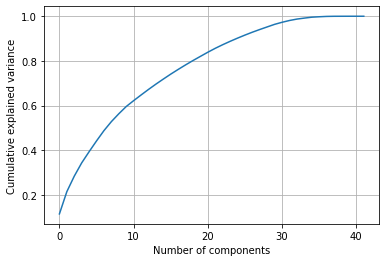

In [81]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


%matplotlib inline
pca = PCA().fit(m)
plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

In [17]:
Y

0        chr1
1        chr1
2        chr1
3        chr1
4        chr1
         ... 
10444    chrX
10445    chrX
10446    chrX
10447    chrX
10448    chrX
Name: Chromosome, Length: 10449, dtype: object

In [84]:
#def PCA_algorithm(X):
n_components=10
p = PCA(n_components)

X_pca = p.fit_transform(m)

columns = []
i=1
while i <= n_components:
    columns.append("PC"+str(i))
    i+=1

PCA_df = pd.DataFrame(data = X_pca, columns=columns)
    
target = pd.Series(Y, name="Chromosome_Id")
    
PCA_df = pd.concat([PCA_df, target], axis = 1)

#   return PCA_df, m
PCA_df["Chromosome_Id"] = LabelEncoder().fit_transform(PCA_df["Chromosome_Id"])
PCA_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Chromosome_Id
0,3.979145,-0.921280,-0.923497,1.113428,-0.841164,-1.591500,-0.171159,0.565237,1.443397,-0.219646,0
1,1.317682,-0.107611,-0.303511,0.029283,-1.815885,-1.328344,0.420572,-0.573913,1.851345,-0.870404,0
2,0.820829,-0.618964,-2.566012,-0.176618,1.743777,2.256823,-2.609096,0.006902,1.205311,0.127907,0
3,-4.499428,1.637063,0.729497,-2.171944,-0.887771,0.454730,-1.013118,1.487732,1.198252,-1.159324,0
4,-0.607608,0.202082,-0.715314,-0.097558,2.824993,1.051873,-2.365121,0.446524,1.057119,2.242261,0
...,...,...,...,...,...,...,...,...,...,...,...
10444,2.645098,0.237889,-0.815833,-0.545009,0.364596,-1.100272,-1.652438,3.461355,1.214783,-0.552188,22
10445,-0.096787,0.372776,-1.430015,-0.046879,-1.898457,-2.718888,0.180666,1.197927,1.569684,-0.712268,22
10446,0.501500,1.897699,3.771737,2.332672,0.712317,0.471788,-0.200540,-0.333329,1.778975,-0.945503,22
10447,0.774702,1.755218,3.310444,0.436857,-0.386881,1.412987,1.887971,1.119767,1.579671,-0.018236,22


In [19]:
#Save results from pca
PCA_df.to_csv("Results/PCA/9_Components_02747363-f04a-4ba6-a079-fe4f87853788.csv",index=False)

In [85]:
# Calculate the variance explained by priciple components
print("Variance of each component:", p.explained_variance_ratio_)
print("\n Total Variance Explained:", 
      round(sum(list(p.explained_variance_ratio_))*100, 2))

Variance of each component: [0.11522058 0.09956258 0.06939951 0.05942354 0.05013104 0.04824769
 0.04604887 0.04029825 0.03503564 0.03229529]

 Total Variance Explained: 59.57


In [21]:
PCA_df["Chromosome_Id"]

0         0
1         0
2         0
3         0
4         0
         ..
10444    22
10445    22
10446    22
10447    22
10448    22
Name: Chromosome_Id, Length: 10449, dtype: int32

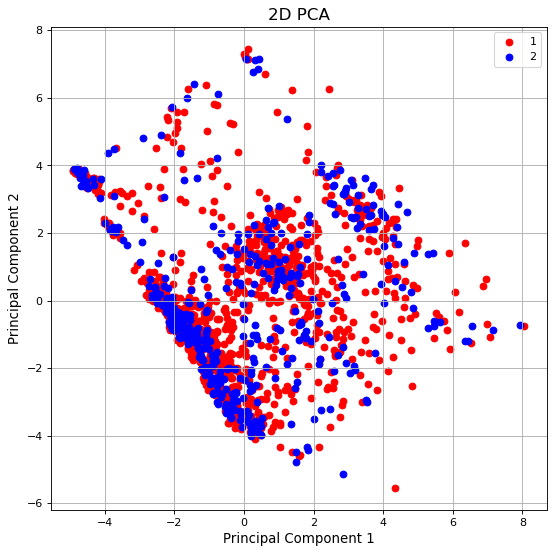

In [22]:
%matplotlib inline
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

classes = [0,1,2,3,4,5,6,7,8,9]
colors = ['r', 'b']
for clas, color in zip(classes, colors):
    plt.scatter(PCA_df.loc[PCA_df["Chromosome_Id"] == clas, 'PC1'], 
                PCA_df.loc[PCA_df["Chromosome_Id"] == clas, 'PC2'], 
                c = color)
    
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('2D PCA', fontsize = 15)
plt.legend(['1', '2'])
plt.grid()

# LDA - Linear Driscriminant Analysis

In [23]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [27]:
len(X.index)

10449

In [24]:
model = LinearDiscriminantAnalysis()
model.fit(X,Y)

LinearDiscriminantAnalysis()

In [26]:
#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))   

0.1931275550422556
